# Clustering:

<hr>

## Modeling Exercise

In [51]:
# Main libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# These two gets data and prepare the data 
import acquire
import prepare

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

### Acquire the iris dataset

In [52]:
iris = acquire.get_iris_data()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Clustering with the Iris Dataset using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.


In [53]:
# Choose features

X = iris[['sepal_width', 'sepal_length']]

In [54]:
# Create instance of the K-means class with number of clusters and centroid == 3
kmeans = KMeans(n_clusters = 3)

# Fit X feature into the object
kmeans.fit(X)

# Predict X
kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [55]:
plt.rc('figure', figsize=(16, 9))
plt.rc('font', size=13)


In [56]:
# Create cluster columns
iris['cluster'] = kmeans.predict(X)
# iris['cluster'] = iris.cluster.astype(categorical) # Recommended to convert 
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2
6,5.4,3.9,1.7,0.4,setosa,2
7,4.6,3.4,1.4,0.3,setosa,2
8,5.0,3.4,1.5,0.2,setosa,2
9,4.4,2.9,1.4,0.2,setosa,2
10,4.9,3.1,1.5,0.1,setosa,2


### Visualize the clusters

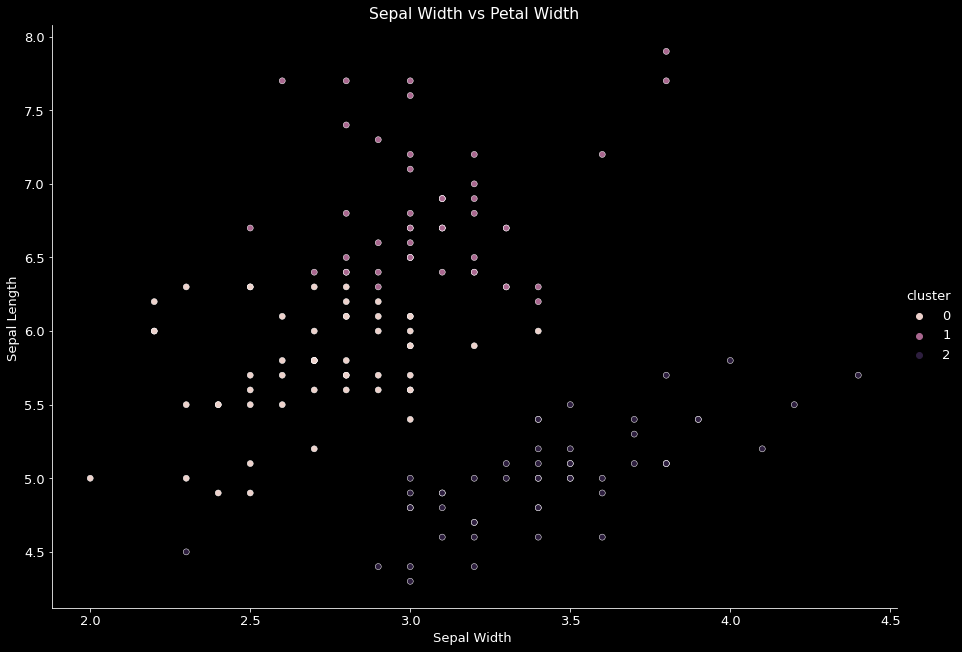

In [57]:
# plt.figure(figsize=(16, 9))
# plt.rc('font', size=13)

sns.relplot(data = iris, x = 'sepal_width', y = 'sepal_length',
            hue='cluster', height=9, aspect=11.7 / 8.27)


plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width ')
plt.ylabel('Sepal Length ')

plt.show()


### Cluster centers (The center point of each cluster.)

- __cluster_centers_:__ The center point of each cluster.
- __labels_:__ The labels for each observation.
- __intertia_:__ The sum of the squared errors from each data point to it's associated cluster.



In [58]:
# Cluster for each cluster
kmeans.cluster_centers_

array([[2.69245283, 5.77358491],
       [3.07446809, 6.81276596],
       [3.428     , 5.006     ]])

In [59]:
# Create centroids object
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids


,sepal_width,sepal_length
0,2.692453,5.773585
1,3.074468,6.812766
2,3.428000,5.006000


In [60]:
# Group by clusters
iris.groupby('cluster')['sepal_width', 'sepal_length'].mean()


,sepal_width,sepal_length
cluster,,
0,2.692453,5.773585
1,3.074468,6.812766
2,3.428000,5.006000


### Visualize cluster centers

Text(0.5, 1.0, 'Visualizing Cluster Centers')

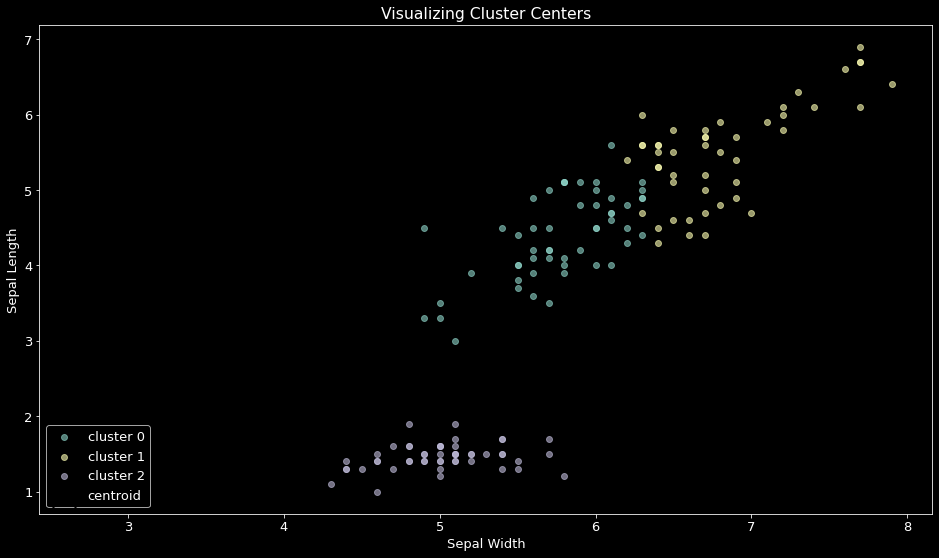

In [61]:
plt.figure(figsize=(16, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length,
                label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_length', x='sepal_width',
                       c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Visualizing Cluster Centers')


### Using the Elbow Method to select 3 good values for k

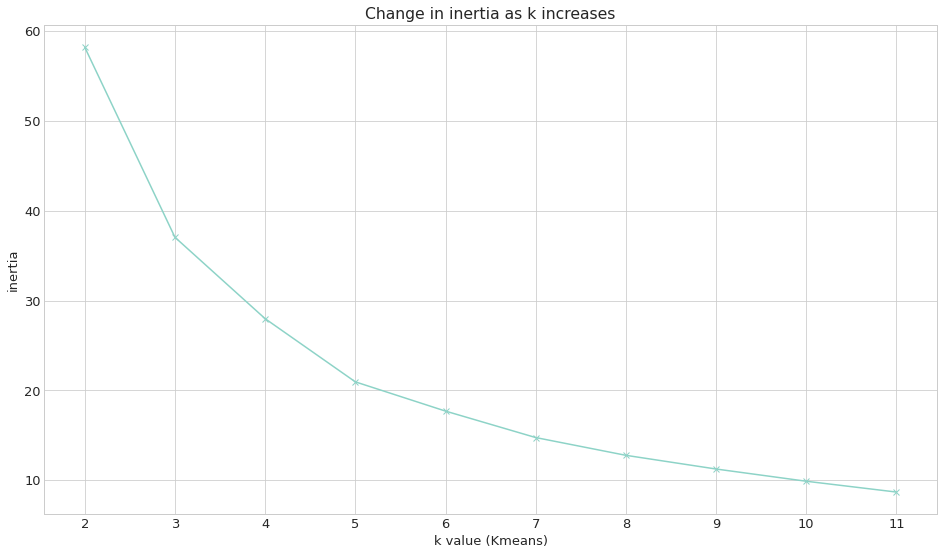

In [62]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 9))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}
              ).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k value (Kmeans)')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


## Conclusion (2 features, cluster == 3)

- ##### In the chart above, we notice that the reduction in inertia drops off after about 3 clusters. Based on the above visualization, we might conclude that the optimal number of clusters is 3.


## K Value with three features:

In [63]:
# Choose features

X1 = iris[['petal_width', 'petal_length', 'sepal_length']]

In [64]:
# Create instance of the K-means class with number of clusters and centroid == 3
kmeans = KMeans(n_clusters=3)

# Fit X feature into the object
kmeans.fit(X1)

# Predict X
kmeans.predict(X1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [65]:
# Create cluster columns
iris['cluster'] = kmeans.predict(X1)
iris.head(3)


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1


In [66]:
# Cluster for each cluster
kmeans.cluster_centers_


array([[1.43387097, 4.39354839, 5.9016129 ],
       [0.246     , 1.462     , 5.006     ],
       [2.07105263, 5.74210526, 6.85      ]])

In [67]:
# Create centroids object
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X1.columns)
centroids


,petal_width,petal_length,sepal_length
0,1.433871,4.393548,5.901613
1,0.246000,1.462000,5.006000
2,2.071053,5.742105,6.850000


In [68]:
# Group by clusters
iris.groupby('cluster')['petal_width', 'petal_length', 'sepal_length'].mean()


,petal_width,petal_length,sepal_length
cluster,,,
0,1.433871,4.393548,5.901613
1,0.246000,1.462000,5.006000
2,2.071053,5.742105,6.850000


#### Elbow method with 3 features ('petal_width', 'petal_length', 'sepal_length')

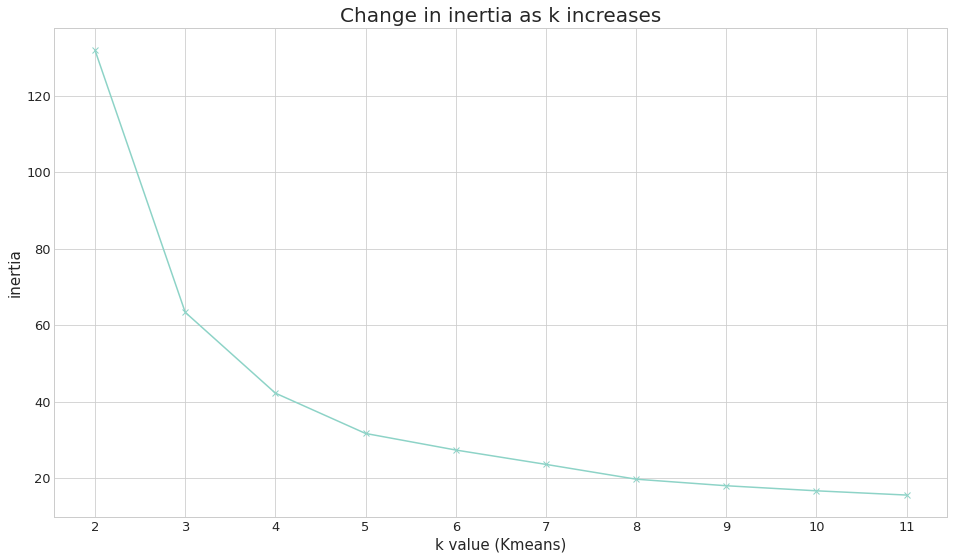

In [69]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 9))
    pd.Series({k: KMeans(k).fit(X1).inertia_ for k in range(2, 12)}
              ).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k value (Kmeans)', size=15)
    plt.ylabel('inertia', size=15)
    plt.title('Change in inertia as k increases', size = 20)


### Conclusion

- Optimal custers is 3. Same as with 2 features

### (2). Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

> ### (A). With Scaled Mall Data..

### Get Scaled Data

In [70]:
scaled_mall = acquire.scale_mall()
scaled_mall.head()

Status: Acquiring data from cached csv file..


,age,annual_income,spending_score,scaled_age,scaled_annual_income,scaled_spending_score
0,19,15,39,0.019231,0.000000,0.387755
1,21,15,81,0.057692,0.000000,0.816327
2,20,16,6,0.038462,0.008197,0.051020
3,23,16,77,0.096154,0.008197,0.775510
4,31,17,40,0.250000,0.016393,0.397959


In [71]:
X3 = scaled_mall[['scaled_age','scaled_annual_income', 'scaled_spending_score']]


In [72]:
# Create instance of the K-means class with number of clusters and centroid == 3
kmeans = KMeans(n_clusters=3)

# Fit X feature into the object
kmeans.fit(X3)

# Predict X
kmeans.predict(X3)


array([1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [73]:
# Create cluster columns
scaled_mall['cluster'] = kmeans.predict(X3)
scaled_mall.head(10)


,age,annual_income,spending_score,scaled_age,scaled_annual_income,scaled_spending_score,cluster
0,19,15,39,0.019231,0.000000,0.387755,1
1,21,15,81,0.057692,0.000000,0.816327,1
2,20,16,6,0.038462,0.008197,0.051020,2
3,23,16,77,0.096154,0.008197,0.775510,1
4,31,17,40,0.250000,0.016393,0.397959,1
5,22,17,76,0.076923,0.016393,0.765306,1
6,35,18,6,0.326923,0.024590,0.051020,0
7,23,18,94,0.096154,0.024590,0.948980,1
8,64,19,3,0.884615,0.032787,0.020408,0
9,30,19,72,0.230769,0.032787,0.724490,1


In [74]:
# Cluster for each cluster
kmeans.cluster_centers_

array([[0.68111366, 0.26192806, 0.39613159],
       [0.20110475, 0.37085804, 0.7086409 ],
       [0.40138067, 0.57124842, 0.18602826]])

In [75]:
# Create centroids object
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X3.columns)
centroids

,scaled_age,scaled_annual_income,scaled_spending_score
0,0.681114,0.261928,0.396132
1,0.201105,0.370858,0.708641
2,0.401381,0.571248,0.186028


In [76]:
# Group by clusters
scaled_mall.groupby('cluster')['scaled_age',
                               'scaled_annual_income', 'scaled_spending_score'].mean()


,scaled_age,scaled_annual_income,scaled_spending_score
cluster,,,
0,0.681114,0.261928,0.396132
1,0.201105,0.370858,0.708641
2,0.401381,0.571248,0.186028


### Using the Elbow Method to select 3 good values for k


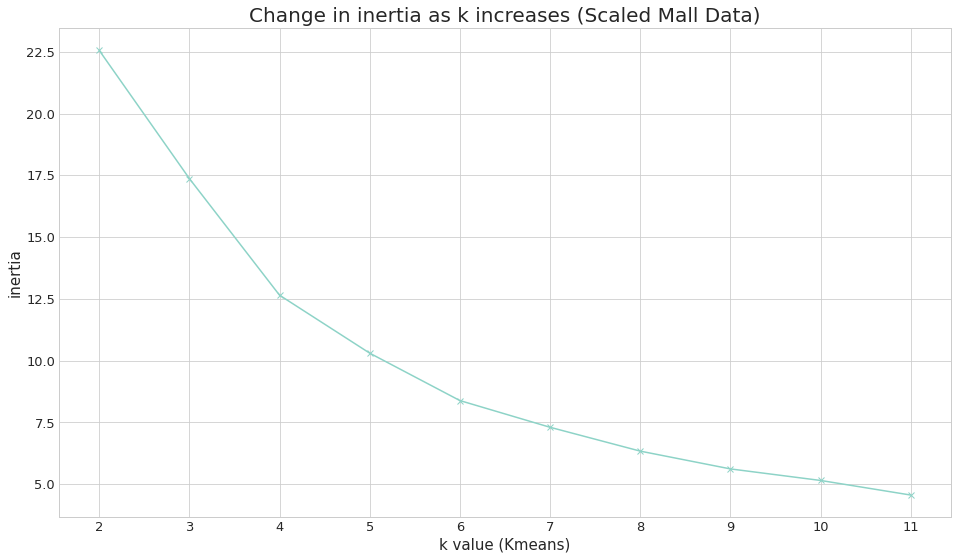

In [77]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 9))
    pd.Series({k: KMeans(k).fit(X3).inertia_ for k in range(2, 12)}
              ).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k value (Kmeans)', size=15)
    plt.ylabel('inertia', size=15)
    plt.title('Change in inertia as k increases (Scaled Mall Data)', size = 20)


### Conclusion:

- With n_cluster == 3 and 3 features, optimal clusters, k, == 4


> ### (B). With Non-Scaled Mall Data..


In [78]:
mall = acquire.get_mall_data()
mall.head()


Status: Acquiring data from cached csv file..


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
X4 = scaled_mall[['scaled_age',
                  'scaled_annual_income', 'scaled_spending_score']]


In [80]:
# Create instance of the K-means class with number of clusters and centroid == 3
kmeans = KMeans(n_clusters=3)

# Fit X feature into the object
kmeans.fit(X4)

# Predict X
kmeans.predict(X4)


array([1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [81]:
# Create cluster columns
scaled_mall['cluster'] = kmeans.predict(X4)
scaled_mall.head(10)


,age,annual_income,spending_score,scaled_age,scaled_annual_income,scaled_spending_score,cluster
0,19,15,39,0.019231,0.000000,0.387755,1
1,21,15,81,0.057692,0.000000,0.816327,1
2,20,16,6,0.038462,0.008197,0.051020,2
3,23,16,77,0.096154,0.008197,0.775510,1
4,31,17,40,0.250000,0.016393,0.397959,1
5,22,17,76,0.076923,0.016393,0.765306,1
6,35,18,6,0.326923,0.024590,0.051020,0
7,23,18,94,0.096154,0.024590,0.948980,1
8,64,19,3,0.884615,0.032787,0.020408,0
9,30,19,72,0.230769,0.032787,0.724490,1


In [82]:
# Cluster for each cluster
kmeans.cluster_centers_


array([[0.68111366, 0.26192806, 0.39613159],
       [0.20110475, 0.37085804, 0.7086409 ],
       [0.40138067, 0.57124842, 0.18602826]])

In [83]:
# Create centroids object
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X4.columns)
centroids


,scaled_age,scaled_annual_income,scaled_spending_score
0,0.681114,0.261928,0.396132
1,0.201105,0.370858,0.708641
2,0.401381,0.571248,0.186028


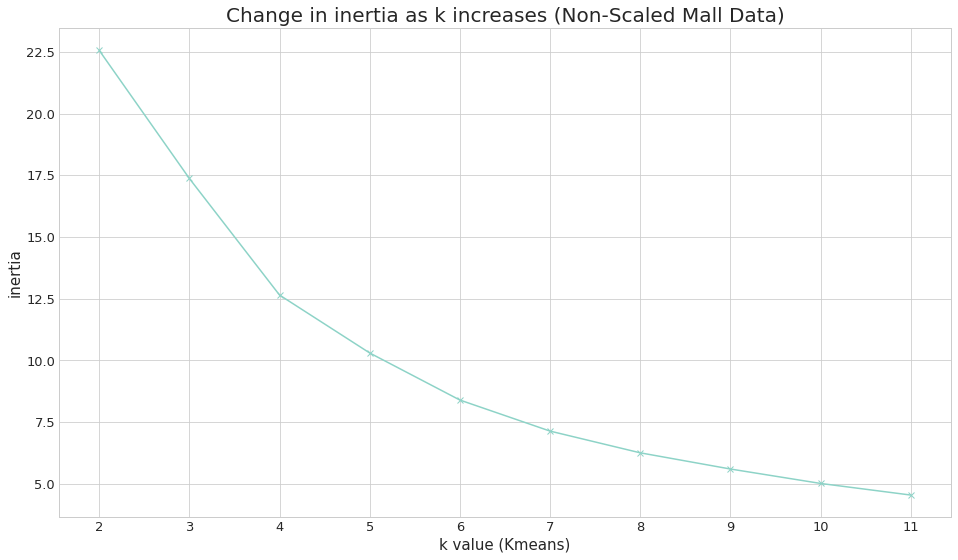

In [84]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 9))
    pd.Series({k: KMeans(k).fit(X4).inertia_ for k in range(2, 12)}
              ).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k value (Kmeans)', size=15)
    plt.ylabel('inertia', size = 15)
    plt.title('Change in inertia as k increases (Non-Scaled Mall Data)', size = 20)


### (3). How does scaling impact the results of clustering?

### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

>### Question 3 Discussion: 
>- ##### From the mall data Modeling with both scaling and non scaled data and 3 features aswell n_clusters = 3; it appears scalin has no effect on the result. The two graphs above appears similar with k of 4. 


## Bonus
-  a) Read in the data from this google sheet: https: // docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data.
- c) Write down the takeaways from this exercise.



In [85]:
# import requests
# import io

# url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing'

# df = requests.get(url).content

# data = pd.read_csv(io.StringIO(df.decode('utf-8')))

# data.head()
